# Data Viz 3

---

## Content

- Multivariate Data Visualization
  - CCN
  - CNN
  - NNN
- Joint plot
- Pairplot
- Correlation Heatmap

---

Importing the data -

In [ ]:
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/021/299/original/final_vg1_-_final_vg_%281%29.csv?1670840166 -O vgsales.csv

--2024-02-20 17:52:16--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/021/299/original/final_vg1_-_final_vg_%281%29.csv?1670840166
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 18.172.139.210, 18.172.139.61, 18.172.139.46, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|18.172.139.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2041483 (1.9M) [text/plain]
Saving to: ‘vgsales.csv’

vgsales.csv         100%[===================>]   1.95M  --.-KB/s    in 0.07s   

2024-02-20 17:52:16 (28.6 MB/s) - ‘vgsales.csv’ saved [2041483/2041483]



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('vgsales.csv')
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,2061,1942,NES,1985.0,Shooter,Capcom,4.569217,3.033887,3.439352,1.991671,12.802935
1,9137,¡Shin Chan Flipa en colores!,DS,2007.0,Platform,505 Games,2.076955,1.493442,3.033887,0.394830,7.034163
2,14279,.hack: Sekai no Mukou ni + Versus,PS3,2012.0,Action,Namco Bandai Games,1.145709,1.762339,1.493442,0.408693,4.982552
3,8359,.hack//G.U. Vol.1//Rebirth,PS2,2006.0,Role-Playing,Namco Bandai Games,2.031986,1.389856,3.228043,0.394830,7.226880
4,7109,.hack//G.U. Vol.2//Reminisce,PS2,2006.0,Role-Playing,Namco Bandai Games,2.792725,2.592054,1.440483,1.493442,8.363113


If you remember, `Genres`, `Publisher` and `Platform` were categorical values.

Hence similar to last lecture, we will use top 3 of each to make our analysis easier.

In [ ]:
top3_pub = data['Publisher'].value_counts().index[:3]
top3_gen = data['Genre'].value_counts().index[:3]
top3_plat = data['Platform'].value_counts().index[:3]
top3_data = data.loc[(data["Publisher"].isin(top3_pub)) & (data["Platform"].isin(top3_plat)) & (data['Genre'].isin(top3_gen))]
top3_data

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
2,14279,.hack: Sekai no Mukou ni + Versus,PS3,2012.0,Action,Namco Bandai Games,1.145709,1.762339,1.493442,0.408693,4.982552
13,2742,[Prototype 2],PS3,2012.0,Action,Activision,3.978349,3.727034,0.848807,2.792725,11.447989
16,1604,[Prototype],PS3,2009.0,Action,Activision,4.569217,4.108402,1.187272,3.339269,13.181205
19,1741,007: Quantum of Solace,PS3,2008.0,Action,Activision,4.156030,4.346074,1.087977,3.390562,12.980643
21,4501,007: Quantum of Solace,PS2,2008.0,Action,Activision,3.228043,2.738800,2.585598,3.652926,11.780257
...,...,...,...,...,...,...,...,...,...,...,...
16438,14938,Yes! Precure 5 Go Go Zenin Shu Go! Dream Festival,DS,2008.0,Action,Namco Bandai Games,1.087977,0.592445,1.087977,0.394830,3.509168
16479,10979,Young Justice: Legacy,PS3,2013.0,Action,Namco Bandai Games,2.186589,1.087977,3.409089,0.394830,7.359902
16601,11802,ZhuZhu Pets: Quest for Zhu,DS,2011.0,Misc,Activision,2.340740,1.525543,3.103825,0.394830,7.372592
16636,9196,Zoobles! Spring to Life!,DS,2011.0,Misc,Activision,2.697415,1.087977,2.760718,0.394830,6.915540


## Multivariate Data Visualization

Let’s try to add a 3rd variable on the top of the plots that we have seen so far.

### NNC

**How can we visualize the correlation between NA and EU, but for different genres?**

Here, we have two numerical and one categorical variable!

- Numerical-Numerical $\rightarrow$ Scatter plot, need to add info about one categorical variable.
- Numerical-Categorical $\rightarrow$ Boxplot, need to add info about one numerical variable.

Let's ask two questions.
- Is it possible to add information about a continuous variable upon boxplots?
  - No
- Is it possible to add information about a categorical variable on scatterplot?
  - Yes (using colors)

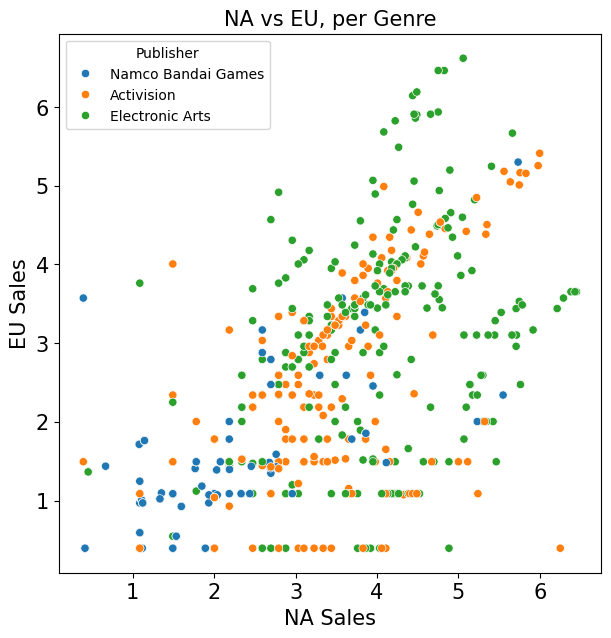

In [ ]:
plt.figure(figsize=(8,7))
sns.scatterplot(x='NA_Sales', y='EU_Sales',hue='Publisher',data=top3_data)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('NA Sales',fontsize=15)
plt.ylabel('EU Sales',fontsize=15)
plt.title('NA vs EU, per Genre', fontsize=15)
plt.show()

**Inferences:**

- If we see this plot, we can notice now that Namco has lower sales correlation, while Activision has a concentrated positivee correlation.
- EA also has positive correlation, but it's more spread compared to Activision.


---

### CCN

**How will you visualize the global sales for each publisher, but separated by genres?**

We have two categorical and one numerical data here!

- Categorical-Categorical $\rightarrow$ Stacked Bar plot, need to add info about one continuous feature.
- Categorical-Numerical $\rightarrow$ Boxplot, need to add categorical variable.

**Which one is easier and possible?**

We can add one categorical variable by “dodging” multiple boxplots.

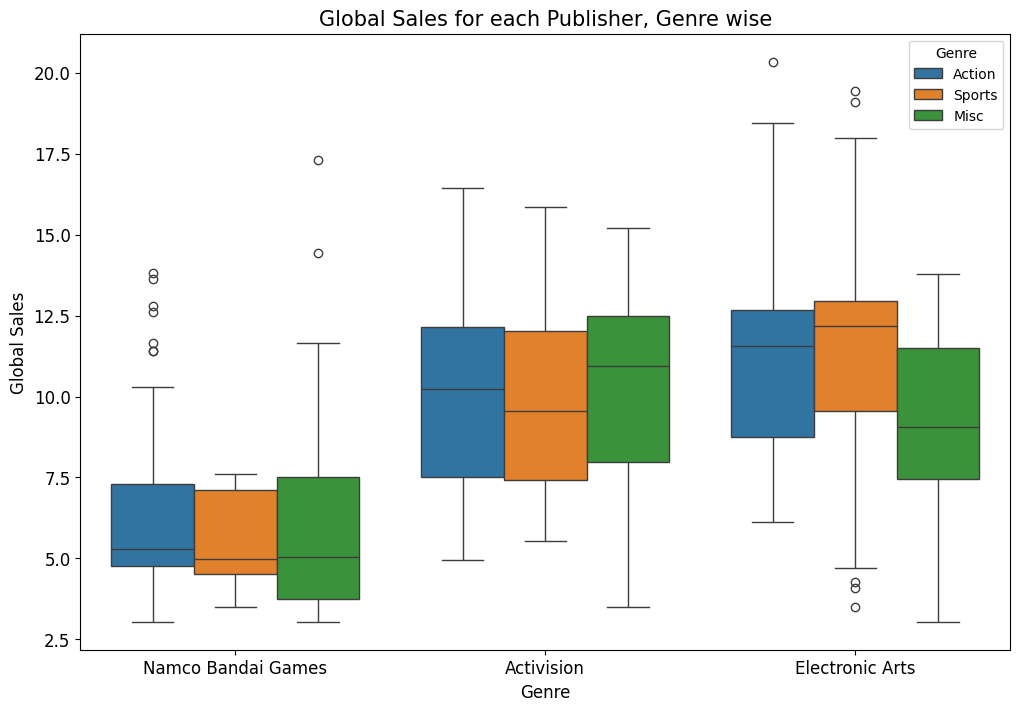

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Publisher',y='Global_Sales',hue='Genre',data=top3_data)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Global Sales', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Global Sales for each Publisher, Genre wise', fontsize=15)
plt.show()

**Inferences:**

- Namco has lower median sales in every genre as compared to all publishers.
- Looking at the Action genre, even though EA and Activision have almost similar medians, Action is more spread in EA.
- An interesting thing to notice here is that for each of the three publishers, three different genre of games have higher sales median.
  - Namco: Action
  - Activision: Misc
  - EA: Sports


---

### NNN

So far we have seen how NA and EU are correlated with each other.

But how can we compare the data when we have 3 numerical variables?

**How does rank affect the correlation between NA and EU Sales?**

We have used scatter plot for two numerical features.

We have two options here -

- Make a 3D Scatterplot
  - Good for 3D visualization, but tough to report/show in static setting.
- Add info about the 3rd feature on the 2D scatter plot itself.
  - Bubble Chart

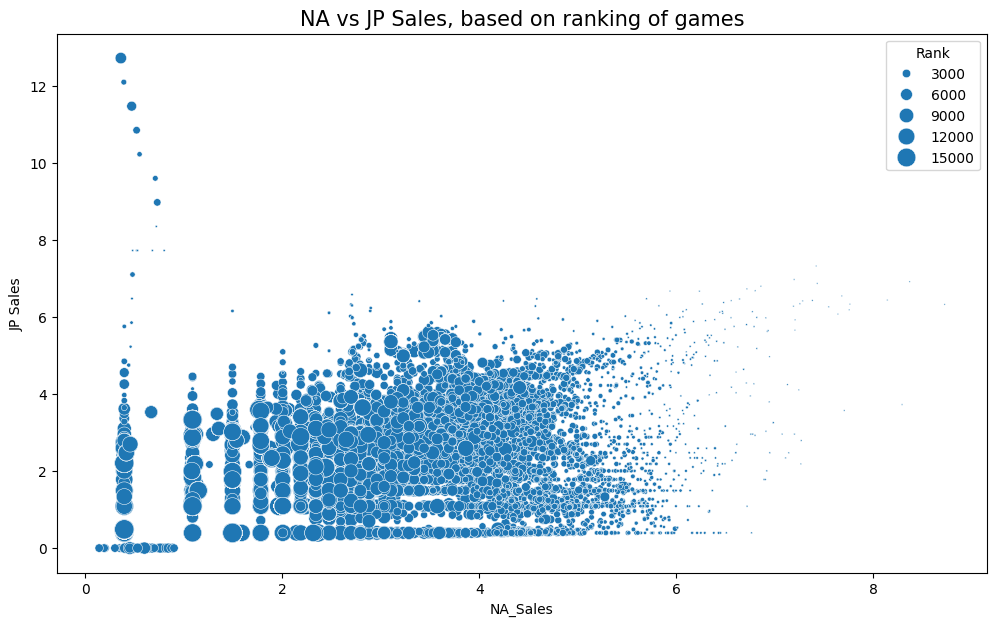

In [ ]:
plt.figure(figsize=(12,7))
sns.scatterplot(x='NA_Sales', y='JP_Sales', size='Rank', sizes=(1, 200), data=data)
plt.xlabel('NA_Sales',fontsize=10)
plt.ylabel('JP Sales', fontsize=10)
plt.title('NA vs JP Sales, based on ranking of games', fontsize=15)
plt.show()

**Inferences:**

- Interestingly, we can notice that higher ranking games are actually on the lower scale of sales, while lower ranking games are high on the sales side.

---

## Joint Plot

- `jointplot()` draws a plot between two variables.
- It shows scatter plot, histogram and KDE plot in the same plot.

Let's check it out -

- We will take **`NA_Sales` as x-coordinates** and **`EU_Sales` as y-coordinates**.
- We can select from different values for parameter `kind and it will plot accordingly.
  - "scatter" | "kde" | "hist" | "hex" | "reg" | "resid"

- We will set the `kind` parameter to **'reg'** here.

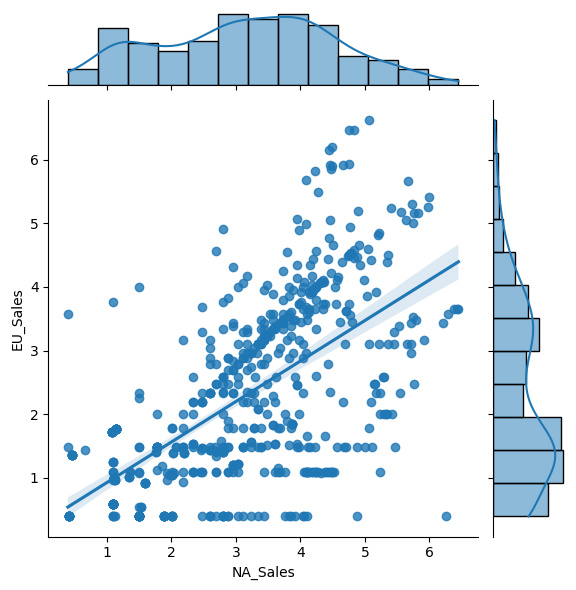

In [ ]:
sns.jointplot(x='NA_Sales', y='EU_Sales', kind='reg', data=top3_data)
plt.show()

As we can see here,
- `jointplot` plots scatter plot, histogram and KDE plot in the same graph, when we set `kind=reg`.
- Scatter plot shows the **scattering of (`NA_Sales`, `EU_Sales`) pairs as (x, y) points**.
- Histogram and KDE plot show the separate distributions of `NA_Sales` and `EU_Sales` in the data.

**We can also add hue to Joint plot.**

Let's check how the 3 genres of games are distributed in terms of `NA_Sales` and `EU_Sales`.

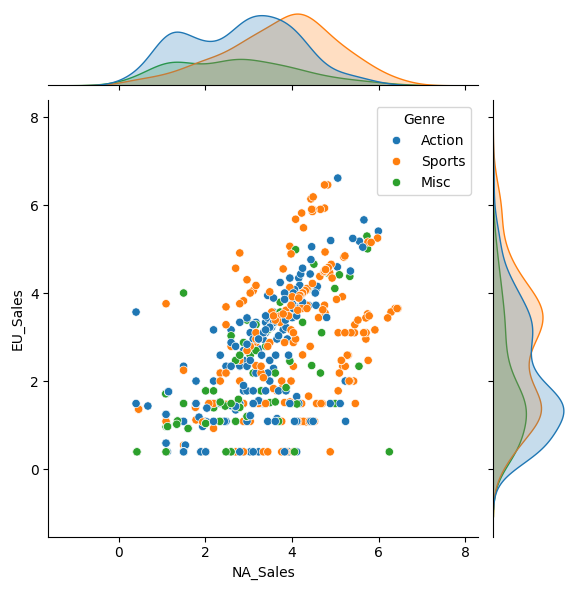

In [ ]:
sns.jointplot(x='NA_Sales', y='EU_Sales', data=top3_data, hue='Genre')
plt.show()

---

### Pair Plot

- `pairplot()` creates a **grid of Axes by default**.
- Each numeric attribute in `data` is shared across **the y-axes across a single row** and the **x-axes across a single column**.
- It displays a **scatterplot between each pair of attributes in the data** with different **hue** for each category.

Since the diagonal plots belong to same attribute at both x and y axis, they are treated differently.

A univariate distribution plot is drawn to show the marginal distribution of the data in each column.

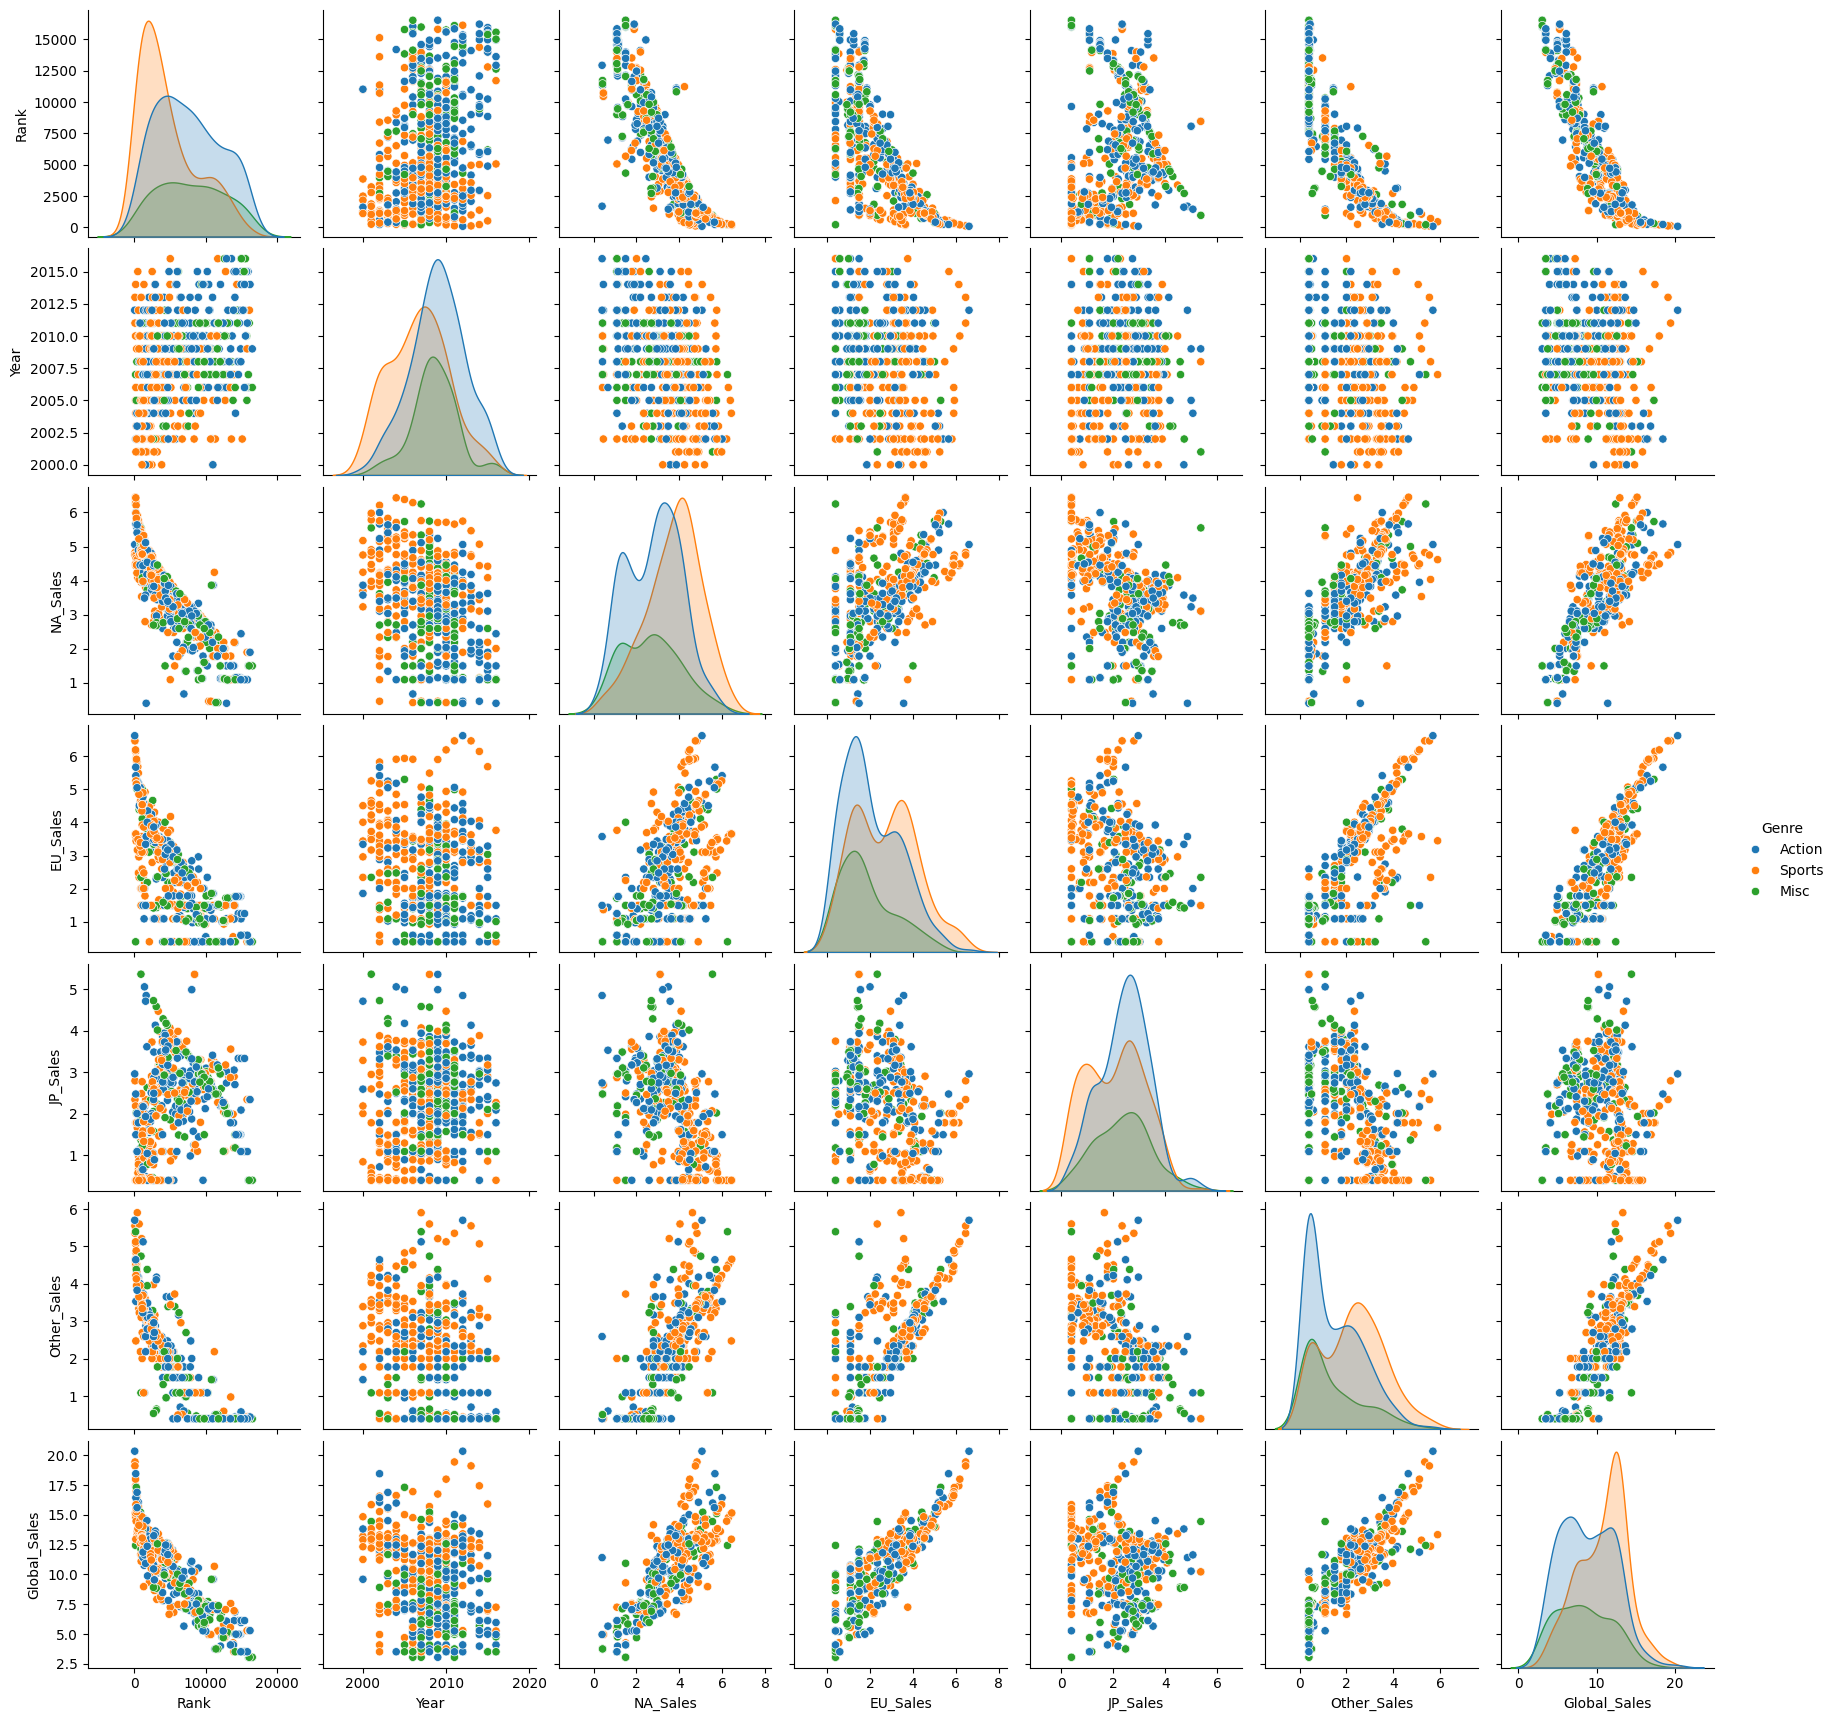

In [ ]:
sns.pairplot(data=top3_data, hue='Genre')
plt.show()

Notice that,

- It is **like a scatter plot of video games with `hue='Genre'`**
- But it is **plotted between every pair of attributes**.
- **Color Legends** for each genre category are given on the **right side**.

Diagonal plots are different from scatter plots because x and y axis have same attribute.

Diagonal plots show a univariate curve category-wise for each attribute.

You can also customize the pairplot to display only a selected subset of variables.

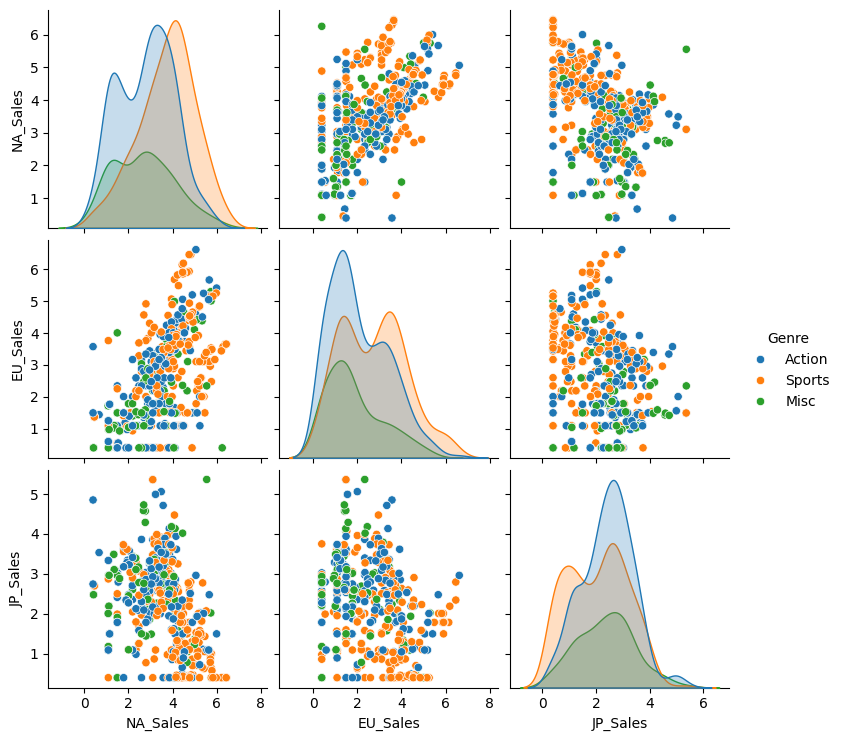

In [ ]:
sns.pairplot(data=top3_data, vars=['NA_Sales', 'EU_Sales', 'JP_Sales'], hue='Genre')

Additionally, you have the option to plot different variables on the rows and columns.

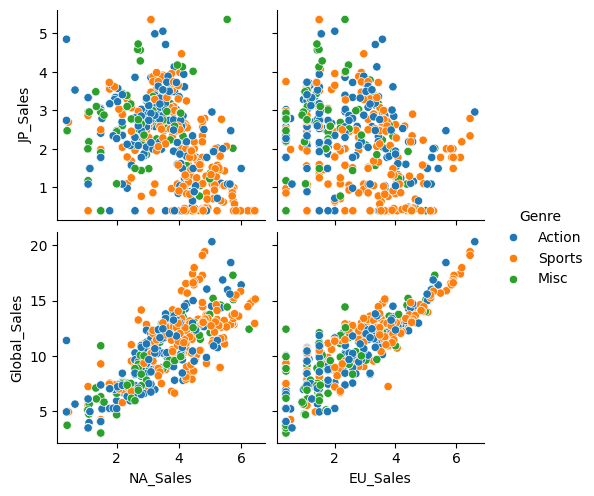

In [ ]:
sns.pairplot(data=top3_data, x_vars=['NA_Sales', 'EU_Sales'], y_vars=['JP_Sales', 'Global_Sales'], hue='Genre')

---

### Correlation Matrix

We can find the level of correlation b/w different attributes (variables).

**But what exactly is a correlation?**

- Two variables are said to be correlated when **they change in the same/opposite direction**.

We can check the **correlation coefficient** using `corr()` method.

In [ ]:
num_df = top3_data.select_dtypes(include=[float,int])
num_df.corr()

<ipython-input-14-c78d7a78d920>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  top3_data.corr()


,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,1.000000,0.328705,-0.873726,-0.735711,0.115459,-0.857567,-0.911721
Year,0.328705,1.000000,-0.354256,-0.178026,0.055864,-0.239876,-0.280351
NA_Sales,-0.873726,-0.354256,1.000000,0.617483,-0.233315,0.794353,0.856300
EU_Sales,-0.735711,-0.178026,0.617483,1.000000,-0.208249,0.771105,0.864147
JP_Sales,0.115459,0.055864,-0.233315,-0.208249,1.000000,-0.355825,-0.014193
Other_Sales,-0.857567,-0.239876,0.794353,0.771105,-0.355825,1.000000,0.878816
Global_Sales,-0.911721,-0.280351,0.856300,0.864147,-0.014193,0.878816,1.000000


- Higher the **magnitude** of coefficient of correlation, more the variables are **correlated**.

- Note that the **sign just determines the direction of change**.
  - `+` means increase in value of one variable causes increase in value of other variable.
  - `-` means increase in value of one variable causes decrease in value of other variable, and vice versa.

As you can see, `Global Sales` and `Rank` have the highest correlation coefficient of -0.91.

Let's plot it using a scatter plot.

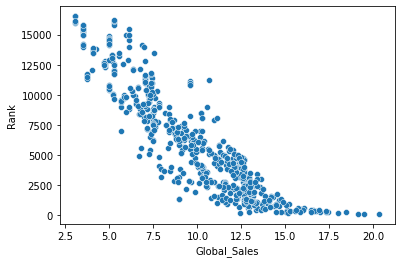

In [ ]:
sns.scatterplot(x= 'Global_Sales', y= 'Rank', data = num_df)
plt.show()

Now let's look at a way to visualize correlation among variables.

---

### Heat Map

- A heat map plots rectangular data as a color-encoded matrix.
- The **more intense the color, the stronger the correlation** between the variables.

Let's plot a Heat Map using the correlation matrix generated using `corr()`.

<ipython-input-15-4220aa71e94f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(top3_data.corr(), cmap= "Blues", annot=True)


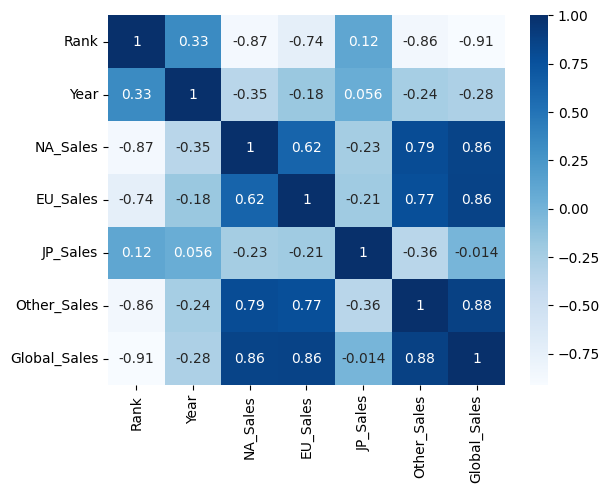

In [ ]:
sns.heatmap(num_df.corr(), cmap= "Blues", annot=True)
plt.show()

- **`annot=True`** is for writing the correlation coefficient inside each cell.
- You can change the colours of cells in heat map if you like.
  - There are a lot of options available!

In [ ]:
print(plt.colormaps())

['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r

<ipython-input-16-72b457990d68>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(top3_data.corr(), cmap= "coolwarm", annot=True)


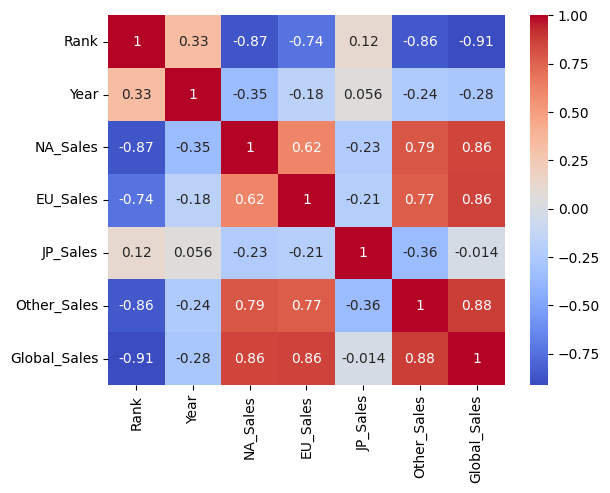

In [ ]:
sns.heatmap(num_df.corr(), cmap= "coolwarm", annot=True)
plt.show()

---

### **Quiz-1**

Q. We are analyzing the results of the Olympics, and want to find the count of gold, silver, and bronze medals won by each country.

Which will be the best suited plot for this?

```
a. Dodged Bar Plot
b. Pie Chart
c. Scatter Plot
d. Line Plot
```

Answer: Dodged Bar Plot

#### **Explanation:**

Bar plots are effective for comparing the quantities of different categories, such as medal counts for different countries, making them ideal for this scenario. Each country can be represented by a bar, with the height of the bar corresponding to the total number of medals won (separately for gold, silver, and bronze). This allows for easy comparison between countries and their respective medal counts.

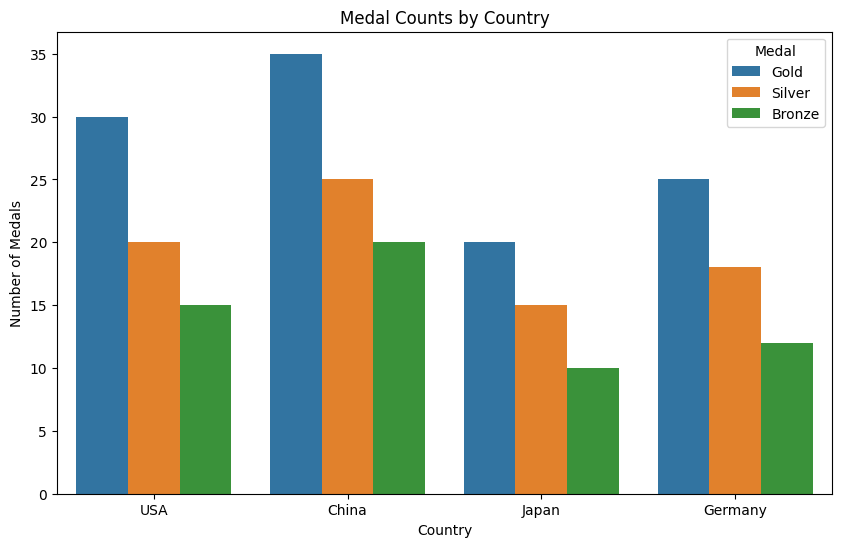

In [ ]:
# Example DataFrame
data = {
    'Country': ['USA', 'China', 'Japan', 'Germany'],
    'Gold': [30, 35, 20, 25],
    'Silver': [20, 25, 15, 18],
    'Bronze': [15, 20, 10, 12]
}

df = pd.DataFrame(data)

# Melt the DataFrame to long format for easier plotting
df_melted = df.melt(id_vars='Country', var_name='Medal', value_name='Count')

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Country', y='Count', hue='Medal', data=df_melted)
plt.xlabel('Country')
plt.ylabel('Number of Medals')
plt.title('Medal Counts by Country')
plt.show()

---

### **Quiz-2**

Q. Suppose in a `2x3 subplot` (2 rows 3 columns), we want to create a plot to span across the first row.

What would be the right code for this?

```
a. plt.subplot(2,1,1)
b. plt.subplot(1,2,(1,1))
c. plt.subplot(2,2,(1,3))
d. plt.subplot(2,3,3)
```

Answer: plt.subplot(2,2,(1,3))

#### **Explanation:**

In `plt.subplot(nrows, ncols, index)`, the function creates subplots in a grid format with `nrows` rows and `ncols` columns, and `index` indicates the position of the subplot in the grid.

* `nrows=2`: Specifies that the subplot grid has 2 rows.
* `ncols=3`: Specifies that the grid has 3 columns.
* `index=(1,3)`: The index 1 refers to the first position in the grid, and 3 refers to the last position in the first row.

By specifying (1,3), you're telling Matplotlib to span the plot across the entire first row, i.e., over columns 1, 2, and 3.

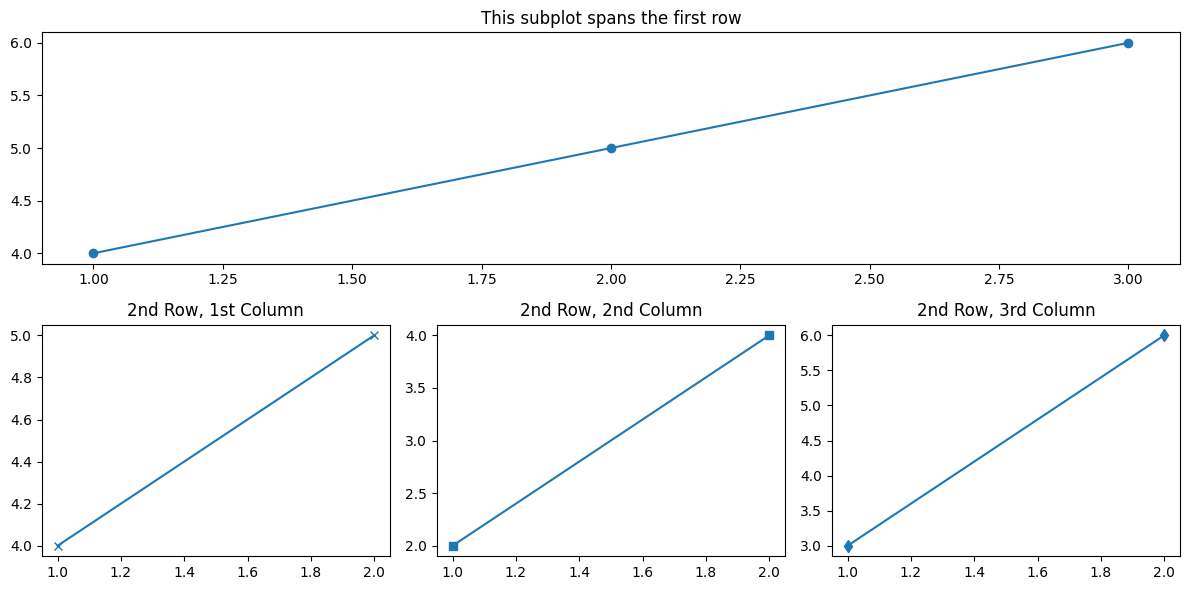

In [ ]:
plt.figure(figsize=(12, 6))

# Subplot spanning the entire first row (1st to 3rd index)
plt.subplot(2, 3, (1, 3))
plt.title('This subplot spans the first row')
plt.plot([1, 2, 3], [4, 5, 6], marker='o')

# Create individual subplots for the remaining cells
plt.subplot(2, 3, 4)
plt.title('2nd Row, 1st Column')
plt.plot([1, 2], [4, 5], marker='x')

plt.subplot(2, 3, 5)
plt.title('2nd Row, 2nd Column')
plt.plot([1, 2], [2, 4], marker='s')

plt.subplot(2, 3, 6)
plt.title('2nd Row, 3rd Column')
plt.plot([1, 2], [3, 6], marker='d')

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()

---